<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [73]:
import micropip
await micropip.install(['numpy'],['pandas'])
await micropip.install(['seaborn'])

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


#### Read the dataset in the csv file from the URL


In [2]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

ImportError: cannot import name 'fetch' from 'js' (C:\Users\pawlo\AppData\Local\Programs\Python\Python313\Lib\site-packages\js\__init__.py)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [138]:

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(URL)
boston_df
#·The following describes the dataset variables:
#·CRIM - per capita crime rate by town
#·ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
#·INDUS - proportion of non-retail business acres per town.
#·CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
#·NOX - nitric oxides concentration (parts per 10 million)
#·RM - average number of rooms per dwelling
#·AGE - proportion of owner-occupied units built prior to 1940
#·DIS - weighted distances to five Boston employment centres
#·RAD - index of accessibility to radial highways
#·TAX - full-value property-tax rate per $10,000
#·PTRATIO - pupil-teacher ratio by town
#·LSTAT - % lower status of the population
#·MEDV - Median value of owner-occupied homes in $1000's

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [166]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


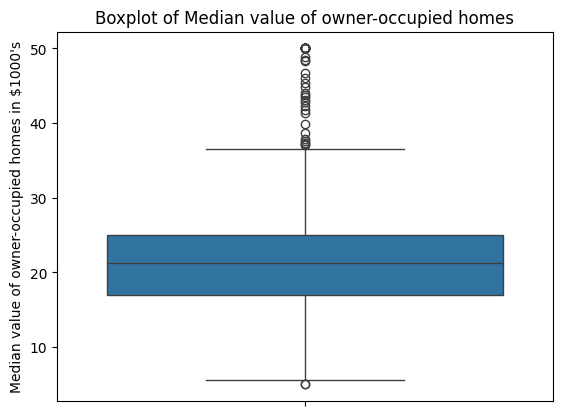

In [140]:
#For the "Median value of owner-occupied homes" provide a boxplot

ax=sns.boxplot(y='MEDV',data=boston_df)
ax.set(title="Boxplot of Median value of owner-occupied homes",
       ylabel="Median value of owner-occupied homes in $1000's")
pyplot.show()

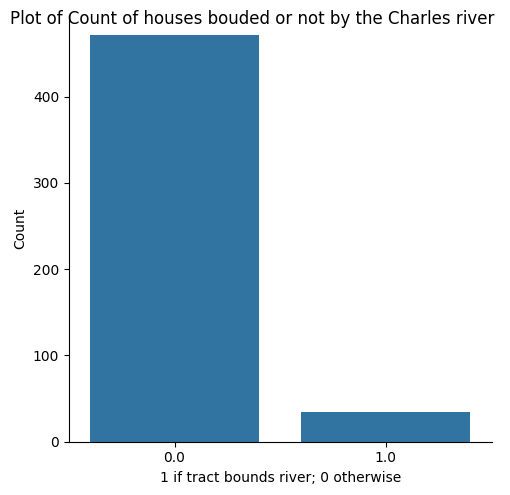

In [141]:
#Provide a  bar plot for the Charles river variable
ax=sns.catplot(x='CHAS',data=boston_df, kind='count')
ax.fig.suptitle("Plot of Count of houses bouded or not by the Charles river")
ax.set_axis_labels("1 if tract bounds river; 0 otherwise", "Count")
pyplot.show()

In [142]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
scipy.stats.levene(boston_df[boston_df['CHAS']==1]['MEDV'],
                    boston_df[boston_df['CHAS']==0]['MEDV'],
                    center='mean')


LeveneResult(statistic=np.float64(8.75190489604598), pvalue=np.float64(0.003238119367639829))

In [ ]:
#Rejecting H0 for equality of variances between samples: pvalue=0.00356<<alpha=0.05 so ttest_ind will be ran with equal_var = False (Welch test)

In [143]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'],
                    boston_df[boston_df['CHAS']==0]['MEDV'],
                    equal_var = False)

TtestResult(statistic=np.float64(3.113291312794837), pvalue=np.float64(0.0035671700981375174), df=np.float64(36.876408797611994))

In [ ]:
# Since H0 states' There is no difference in prices between houses bounded and not bounded by the Charles river', 
# and pvalue=0.003567<<alpha 0.05,therefore rejecting H0. There is a significant difference in value between houses bounded v not bouded by the Charles river 

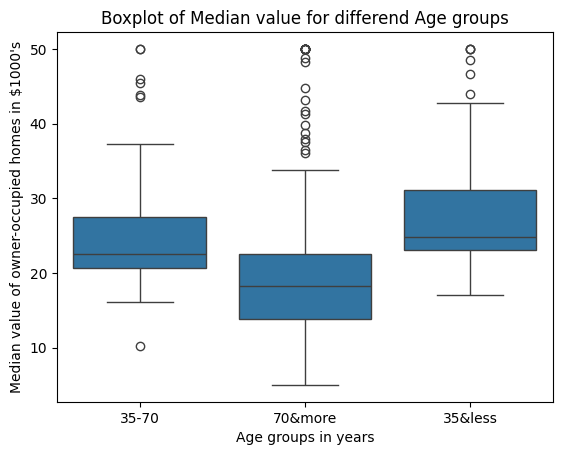

In [144]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df['AGE']<=35),'age_gr']='35&less'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70),'age_gr']='35-70'
boston_df.loc[(boston_df['AGE']>70),'age_gr']='70&more'

ax=sns.boxplot(x='age_gr', y='MEDV', data=boston_df)
ax.set(title="Boxplot of Median value for differend Age groups",
       ylabel="Median value of owner-occupied homes in $1000's",
       xlabel="Age groups in years")
pyplot.show()

In [172]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
scipy.stats.levene(boston_df[boston_df['age_gr']=='35&less']['MEDV'],
                   boston_df[boston_df['age_gr']=='35-70']['MEDV'],
                   boston_df[boston_df['age_gr']=='70&more']['MEDV'],
                   center='mean')

# Pvalue=0.0629>alpha=0.05. We can assume equal variances between groups.

LeveneResult(statistic=np.float64(2.7806200293748304), pvalue=np.float64(0.06295337343259205))

In [173]:
# H0' No difference in price based on AGE variable (groupped into three bins)'

low = boston_df[boston_df['age_gr'] == '35&less']['MEDV']
med = boston_df[boston_df['age_gr'] == '35-70']['MEDV']
high = boston_df[boston_df['age_gr'] == '70&more']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(low, med, high)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

#Pvalue has 15 zeros after comma, meaning rejecting H0 

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


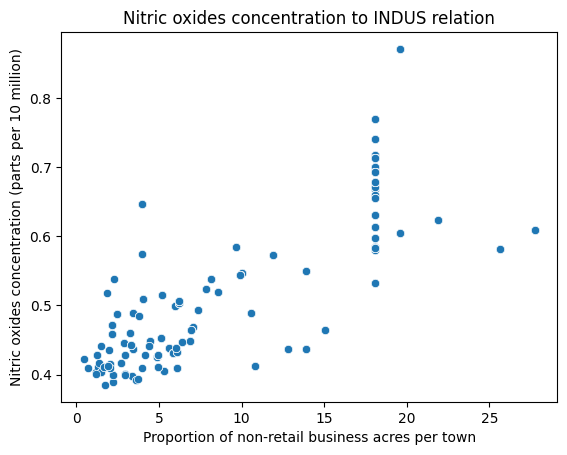

In [154]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
ax=sns.scatterplot(x='INDUS',y='NOX', data=boston_df)
ax.set(title="Nitric oxides concentration to INDUS relation",
      ylabel="Nitric oxides concentration (parts per 10 million)",
      xlabel="Proportion of non-retail business acres per town")
pyplot.show()

In [155]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
#H0: There is no relation between  Nitric oxide concentrations and proportion of non-retail business acres per town.
scipy.stats.pearsonr(boston_df['INDUS'],boston_df['NOX'])

#Pvalue=0 , rejecting H0, there is a relation 

PearsonRResult(statistic=np.float64(0.763651446920915), pvalue=np.float64(7.913361061241532e-98))

In [165]:
y=boston_df['NOX']   #dependant
X=boston_df['INDUS']    #predictor
X=sm.add_constant(X)  
model=sm.OLS(y,X).fit()  
predict=model.predict(X) 
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           7.91e-98
Time:                        11:37:40   Log-Likelihood:                 594.45
No. Observations:                 506   AIC:                            -1185.
Df Residuals:                     504   BIC:                            -1176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4110      0.006     64.710      0.000       0.399       0.424
INDUS          0.0129      0.000     26.554      0.000       0.012       0.014
==============================================================================
Omnibus:                       35.023   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.995
Skew:                           0.548   Prob(JB):                     3.78e-11
Kurtosis:                       4.038   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

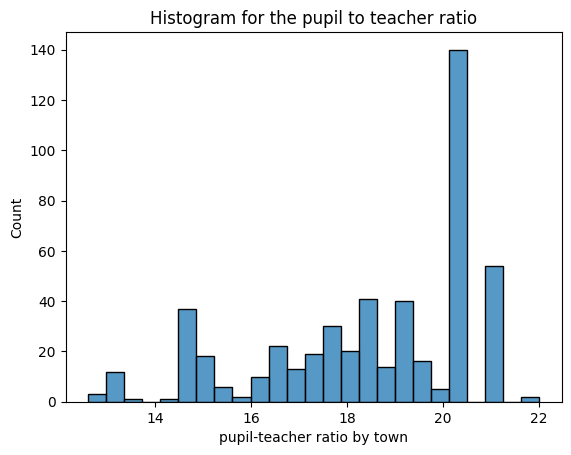

In [158]:
#Create a histogram for the pupil to teacher ratio variable
ax=sns.histplot(boston_df['PTRATIO'],bins=25)
ax.set(title="Histogram for the pupil to teacher ratio",
       xlabel="pupil-teacher ratio by town",
       ylabel="Count")
pyplot.show()

In [ ]:
#Be sure to:
#State your hypothesis.
#Use α = 0.05
#Perform the test Statistics.
#State the conclusion from the test.

In [21]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
#·DIS - weighted distances to five Boston employment centres
#·MEDV - Median value of owner-occupied homes in $1000's

y=boston_df['MEDV']   #dependant
X=boston_df['DIS']    #predictor
X=sm.add_constant(X)  
model=sm.OLS(y,X).fit()  
predict=model.predict(X) 
model.summary()

#For the H0 'Median value of owner-occupied homes does not depend from weighted distances to five Boston employment centres ' Pvalue is close to 0 , so we reject it.
#

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        09:28:42   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

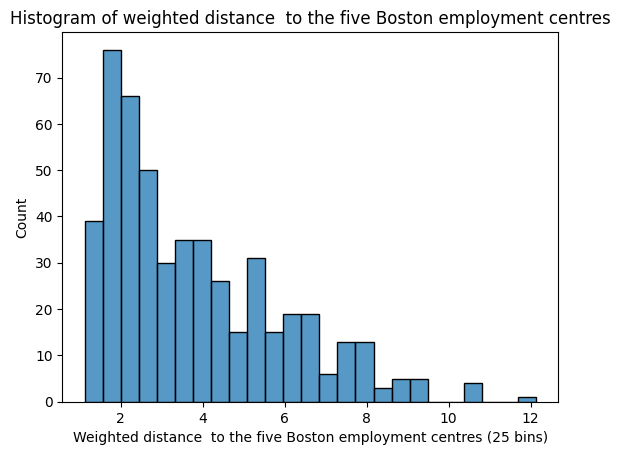

In [170]:
ax=sns.histplot(boston_df['DIS'],bins=25)
ax.set(title="Histogram of weighted distance  to the five Boston employment centres",      
       xlabel="Weighted distance  to the five Boston employment centres (25 bins)",      
       ylabel="Count")
pyplot.show()